## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv', sep=';') #load the data

## Understanding the Data

### Column Descriptions:
1. **age**: Numeric value representing the age of the client.
2. **job**: Type of job (categorical):
   - "admin."
   - "unknown"
   - "unemployed"
   - "management"
   - "housemaid"
   - "entrepreneur"
   - "student"
   - "blue-collar"
   - "self-employed"
   - "retired"
   - "technician"
   - "services"
3. **marital**: Marital status (categorical):
   - "married"
   - "divorced" (includes divorced or widowed)
   - "single"
4. **education**: Education level (categorical):
   - "unknown"
   - "secondary"
   - "primary"
   - "tertiary"
5. **default**: Whether the client has credit in default (binary):
   - "yes"
   - "no"
6. **balance**: Average yearly balance in euros (numeric).
7. **housing**: Whether the client has a housing loan (binary):
   - "yes"
   - "no"
8. **loan**: Whether the client has a personal loan (binary):
   - "yes"
   - "no"

**Related to the last contact of the current campaign:**
9. **contact**: Contact communication type (categorical):
   - "unknown"
   - "telephone"
   - "cellular"
10. **day**: Last contact day of the month (numeric).
11. **month**: Last contact month of the year (categorical):
   - "jan"
   - "feb"
   - "mar"
   - "apr"
   - "may"
   - "jun"
   - "jul"
   - "aug"
   - "sep"
   - "oct"
   - "nov"
   - "dec"
12. **duration**: Last contact duration, in seconds (numeric).

**Other Attributes:**
13. **campaign**: Number of contacts performed during this campaign for this client (numeric, includes the last contact).
14. **pdays**: Number of days since the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted).
15. **previous**: Number of contacts performed before this campaign for this client (numeric).
16. **poutcome**: Outcome of the previous marketing campaign (categorical):
   - "unknown"
   - "other"
   - "failure"
   - "success"

**Output Variable (Desired Target):**
17. **y**: Whether the client subscribed to a term deposit (binary):
   - "yes"
   - "no"

**Missing Attribute Values**: None
Attribute Values: None


In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
(df == 'unknown').sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Preprocessing & EDA

poutcome is unknown for most of the values, so it makes sense to drop the column. There's no real useful information that it can provide.

In [7]:
df.drop(['poutcome'], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

df['job_encoded'] = le.fit_transform(df['job'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping, "\n")

df['marital_encoded'] = le.fit_transform(df['marital'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping, "\n")

df['contact_encoded'] = le.fit_transform(df['contact'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

df

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11} 

{'divorced': 0, 'married': 1, 'single': 2} 

{'cellular': 0, 'telephone': 1, 'unknown': 2}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job_encoded,marital_encoded,contact_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,4,1,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no,9,2,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,2,1,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,1,1,2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no,11,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes,9,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes,5,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes,5,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no,1,1,1


In [10]:
months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_encoded'] = df['month'].map(months)

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job_encoded,marital_encoded,contact_encoded,month_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,4,1,2,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no,9,2,2,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,2,1,2,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,1,1,2,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no,11,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes,9,1,0,11
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes,5,0,0,11
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes,5,1,0,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no,1,1,1,11


In [12]:
education_ranked = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education_encoded'] = df['education'].map(education_ranked)

In [13]:
df = pd.get_dummies(df, columns=['default', 'housing', 'loan', 'y'])

df.drop(['default_no', 'housing_no', 'loan_no', 'y_no'], axis=1, inplace=True)
df.rename(columns={'default_yes': 'default', 'housing_yes': 'housing', 'loan_yes': 'loan', 'y_yes': 'y'}, inplace=True)

In [14]:
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,previous,job_encoded,marital_encoded,contact_encoded,month_encoded,education_encoded,default,housing,loan,y
0,58,management,married,tertiary,2143,unknown,5,may,261,1,...,0,4,1,2,5,3,False,True,False,False
1,44,technician,single,secondary,29,unknown,5,may,151,1,...,0,9,2,2,5,2,False,True,False,False
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,...,0,2,1,2,5,2,False,True,True,False
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,...,0,1,1,2,5,0,False,True,False,False
4,33,unknown,single,unknown,1,unknown,5,may,198,1,...,0,11,2,2,5,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,...,0,9,1,0,11,3,False,False,False,True
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,...,0,5,0,0,11,1,False,False,False,True
45208,72,retired,married,secondary,5715,cellular,17,nov,1127,5,...,3,5,1,0,11,2,False,False,False,True
45209,57,blue-collar,married,secondary,668,telephone,17,nov,508,4,...,0,1,1,1,11,2,False,False,False,False


In [15]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'cellular': 0, 'telephone': 1, 'unknown': 2}


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   balance            45211 non-null  int64 
 5   contact            45211 non-null  object
 6   day                45211 non-null  int64 
 7   month              45211 non-null  object
 8   duration           45211 non-null  int64 
 9   campaign           45211 non-null  int64 
 10  pdays              45211 non-null  int64 
 11  previous           45211 non-null  int64 
 12  job_encoded        45211 non-null  int32 
 13  marital_encoded    45211 non-null  int32 
 14  contact_encoded    45211 non-null  int32 
 15  month_encoded      45211 non-null  int64 
 16  education_encoded  45211 non-null  int64

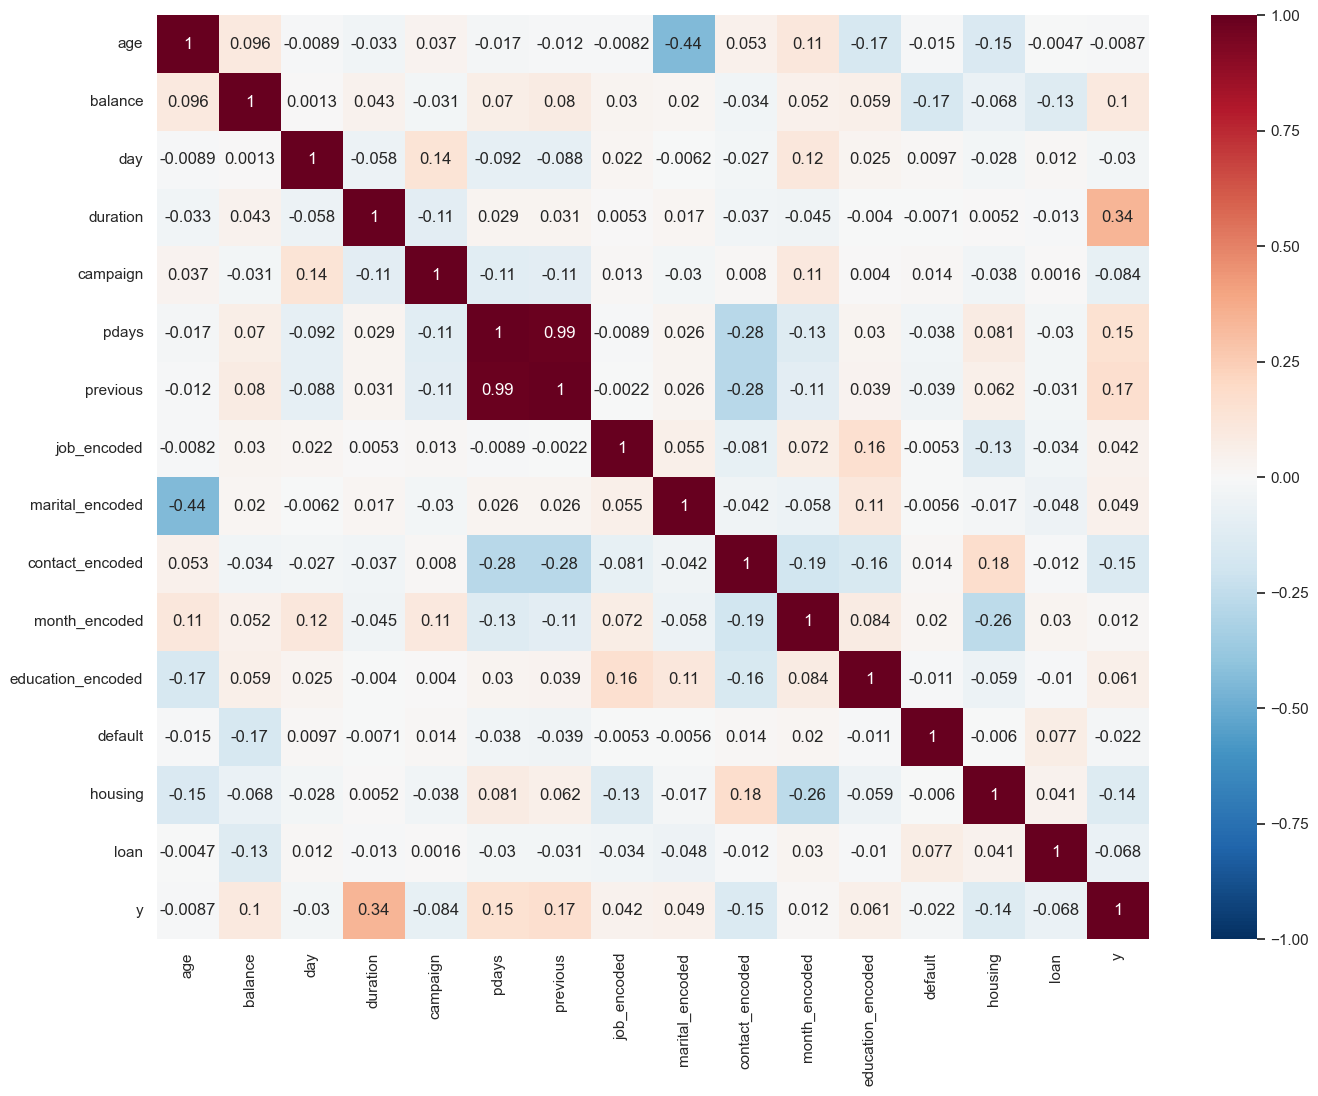

In [17]:
selected_cols= df.columns.drop(['job', 'marital', 'education', 'contact', 'month'])
df_encoded = df[selected_cols]
corr = df_encoded.corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1
);

In [18]:
(df == 'unknown').sum()

age                      0
job                    288
marital                  0
education             1857
balance                  0
contact              13020
day                      0
month                    0
duration                 0
campaign                 0
pdays                    0
previous                 0
job_encoded              0
marital_encoded          0
contact_encoded          0
month_encoded            0
education_encoded        0
default                  0
housing                  0
loan                     0
y                        0
dtype: int64

## Model 1: 

## Model 2:

## Final Comparisons